In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('kepler_data.csv',skiprows=52)

In [4]:
df.shape

(9564, 49)

In [5]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

##### Checking the null values

In [6]:
df['kepler_name'].value_counts()

Kepler-227 b      1
Kepler-142 d      1
Kepler-405 c      1
Kepler-132 A d    1
Kepler-405 b      1
                 ..
Kepler-345 b      1
Kepler-354 d      1
Kepler-1069 b     1
Kepler-1070 b     1
Kepler-1629 b     1
Name: kepler_name, Length: 2360, dtype: int64

In [7]:
df['koi_teq_err1'].value_counts()

Series([], Name: koi_teq_err1, dtype: int64)

In [8]:
df['koi_teq_err1'].value_counts()

Series([], Name: koi_teq_err1, dtype: int64)

##### Drop the column which does not provide any information

In [9]:
df.drop(['kepler_name','koi_teq_err1','koi_teq_err2','kepid','kepoi_name'],axis=1,inplace=True)

In [10]:
nullcolumns=[]
for i,j in zip(df.isnull().sum().index,df.isnull().sum().values):
    if j>0:
        nullcolumns.append(i)

In [11]:
nullcolumns

['koi_score',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'koi_kepmag']

In [12]:
for i in nullcolumns:
    print(f"{i}: {len(df[i].value_counts().index)}: {df[i].dtype}")

koi_score: 650: float64
koi_period_err1: 7448: float64
koi_period_err2: 7448: float64
koi_time0bk_err1: 2530: float64
koi_time0bk_err2: 2530: float64
koi_impact: 2406: float64
koi_impact_err1: 2217: float64
koi_impact_err2: 1884: float64
koi_duration_err1: 2264: float64
koi_duration_err2: 2264: float64
koi_depth: 6947: float64
koi_depth_err1: 1428: float64
koi_depth_err2: 1428: float64
koi_prad: 2988: float64
koi_prad_err1: 1787: float64
koi_prad_err2: 1561: float64
koi_teq: 2511: float64
koi_insol: 7801: float64
koi_insol_err1: 7130: float64
koi_insol_err2: 6560: float64
koi_model_snr: 2740: float64
koi_tce_plnt_num: 8: float64
koi_tce_delivname: 3: object
koi_steff: 2445: float64
koi_steff_err1: 265: float64
koi_steff_err2: 376: float64
koi_slogg: 1557: float64
koi_slogg_err1: 553: float64
koi_slogg_err2: 430: float64
koi_srad: 2289: float64
koi_srad_err1: 1162: float64
koi_srad_err2: 1384: float64
koi_kepmag: 3887: float64


In [13]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

In [14]:
df.groupby(['koi_disposition']).mean()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,0.830566,0.000423,0.000845,0.000000,0.00000,145.048495,0.002938,-0.002938,176.300776,0.014751,-0.014751,0.627844,1.448951,-0.357265,5.029457,0.466590,-0.466590,1232.300708,43.070659,-43.070659,81.651729,19.900818,-23.016254,815.468377,1103.617412,765.078079,-535.337319,30.385007,1.317708,5640.366210,140.479379,-155.104213,4.328541,0.113800,-0.148709,1.530391,0.338771,-0.306997,291.765557,44.054427,14.343874
CONFIRMED,0.962822,0.198049,0.005937,0.000000,0.00000,27.700386,0.000222,-0.000222,157.567688,0.004203,-0.004203,0.430456,0.297312,-0.313015,4.319376,0.123090,-0.123090,1132.839669,22.487993,-22.487993,2.879737,0.479453,-0.388791,834.479423,345.328328,184.702317,-130.095647,86.649300,1.448085,5478.490454,116.862537,-124.277304,4.411263,0.089866,-0.106429,1.065722,0.175652,-0.149717,290.961341,44.363520,14.337445
FALSE POSITIVE,0.038105,0.315496,0.456612,0.390289,0.23719,65.127814,0.002761,-0.002761,165.434786,0.010527,-0.010527,0.944701,3.083919,-0.330465,6.545508,0.390234,-0.390234,46573.804626,215.795185,-215.795185,164.805837,25.385671,-54.743919,1347.587388,14773.110907,7031.635796,-7757.602363,462.221471,1.101008,5857.039276,161.324487,-185.734717,4.249088,0.140454,-0.159678,2.167522,0.472228,-0.567795,292.739514,43.421700,14.190355


<Axes: >

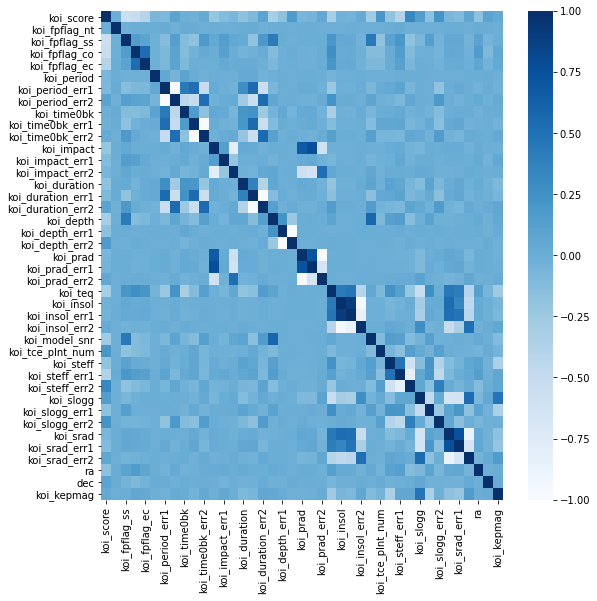

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),cmap='Blues')

In [16]:
len(nullcolumns)

33

##### Count the number of outliers

In [17]:
def count_outliers(columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3 - q1
    minimum=q1 - (1.5*iqr)
    maximum=q3 + (1.5*iqr)
    return len(df[(df[columns]>maximum)|(df[columns]<minimum)])

##### If the number of outliers are less than 500, replace with mean, else with median
##### If the column is string replace with mode

In [18]:
meancolumns=[]
mediancolumns=[]
modecolumns=[]
for i in nullcolumns:
    try:
        if count_outliers(i)<500:
            meancolumns.append(i)
        else:
            mediancolumns.append(i)
    except:
        modecolumns.append(i)

In [19]:
count_outliers('koi_kepmag'),count_outliers('koi_slogg_err2')

(156, 105)

<Axes: xlabel='koi_kepmag'>

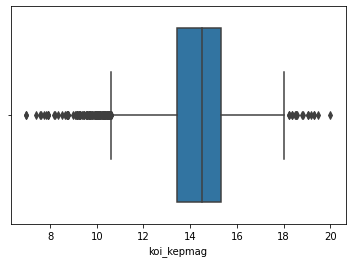

In [20]:
sns.boxplot(df['koi_kepmag'])

In [21]:
for i in meancolumns:
    df[i]=df[i].fillna(df[i].mean())
for i in mediancolumns:
    df[i]=df[i].fillna(df[i].median())
for i in modecolumns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [22]:
df.isnull().sum()

koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag 

In [23]:
df.head(1)

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.0,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347


In [24]:
df['koi_pdisposition'].value_counts()

FALSE POSITIVE    4847
CANDIDATE         4717
Name: koi_pdisposition, dtype: int64

##### The dataset is imbalanced

In [25]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

In [26]:
df['koi_tce_delivname'].value_counts()

q1_q17_dr25_tce    8400
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64

In [27]:
le=LabelEncoder()
for i in ['koi_pdisposition','koi_tce_delivname']:
    df[i]=le.fit_transform(df[i])

In [28]:
df.head(1)

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,1.0,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,2,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347


In [29]:
x=df.drop(['koi_disposition'],axis=1).values
y=df['koi_disposition'].values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=df['koi_disposition'])

In [31]:
print('Training dataset rows: ',x_train.shape[0])
print('Testing dataset rows: ',x_test.shape[0])

Training dataset rows:  7651
Testing dataset rows:  1913


In [32]:
models=["Logistic Regression","Random Forest Classifier","Decision Tree Classifier","Support Vector Classifier"]
classes=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC()]
acc=[]
bal_acc=[]
f1=[]
for m,c in zip(models,classes):
    model=c
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    bal_acc.append(balanced_accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred,average='weighted'))

In [33]:
result=pd.DataFrame()
result['Models']=models
result['Accuracy']=acc
result['Balanced Accuracy']=bal_acc
result['F1 Score']=f1

In [43]:
result.sort_values(['Accuracy'],ascending=False)

,Models,Accuracy,Balanced Accuracy,F1 Score
1,Random Forest Classifier,0.917930,0.889242,0.917845
2,Decision Tree Classifier,0.879247,0.837020,0.879040
0,Logistic Regression,0.601673,0.553186,0.594968
3,Support Vector Classifier,0.506012,0.333333,0.340034


In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rfccoeff=pd.DataFrame()
rfccoeff['Features']=df.columns.delete(0)
rfccoeff['Importance']=rfc.feature_importances_

In [37]:
rfccoeff.sort_values(['Importance'],ascending=False)

,Features,Importance
0,koi_pdisposition,0.244567
1,koi_score,0.130626
28,koi_model_snr,0.052310
3,koi_fpflag_ss,0.043934
2,koi_fpflag_nt,0.043427
4,koi_fpflag_co,0.039356
32,koi_steff_err1,0.031158
21,koi_prad,0.029706
16,koi_duration_err1,0.029190
17,koi_duration_err2,0.024371


In [38]:
params={'n_estimators':[100,150,200,250],
       'max_depth':[5,7,9,11],
       'min_samples_split':[11,13,15,17]}
gscv=GridSearchCV(rfc,param_grid=params,scoring='balanced_accuracy',cv=5,verbose=10)
gscv.fit(x,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START max_depth=5, min_samples_split=11, n_estimators=100........
[CV 1/5; 1/64] END max_depth=5, min_samples_split=11, n_estimators=100;, score=0.733 total time=   2.0s
[CV 2/5; 1/64] START max_depth=5, min_samples_split=11, n_estimators=100........
[CV 2/5; 1/64] END max_depth=5, min_samples_split=11, n_estimators=100;, score=0.844 total time=   2.0s
[CV 3/5; 1/64] START max_depth=5, min_samples_split=11, n_estimators=100........
[CV 3/5; 1/64] END max_depth=5, min_samples_split=11, n_estimators=100;, score=0.874 total time=   2.0s
[CV 4/5; 1/64] START max_depth=5, min_samples_split=11, n_estimators=100........
[CV 4/5; 1/64] END max_depth=5, min_samples_split=11, n_estimators=100;, score=0.961 total time=   2.0s
[CV 5/5; 1/64] START max_depth=5, min_samples_split=11, n_estimators=100........
[CV 5/5; 1/64] END max_depth=5, min_samples_split=11, n_estimators=100;, score=0.854 total time=   2.0s
[CV 1/5; 2/64

[CV 5/5; 9/64] END max_depth=5, min_samples_split=15, n_estimators=100;, score=0.846 total time=   1.9s
[CV 1/5; 10/64] START max_depth=5, min_samples_split=15, n_estimators=150.......
[CV 1/5; 10/64] END max_depth=5, min_samples_split=15, n_estimators=150;, score=0.741 total time=   3.0s
[CV 2/5; 10/64] START max_depth=5, min_samples_split=15, n_estimators=150.......
[CV 2/5; 10/64] END max_depth=5, min_samples_split=15, n_estimators=150;, score=0.848 total time=   3.1s
[CV 3/5; 10/64] START max_depth=5, min_samples_split=15, n_estimators=150.......
[CV 3/5; 10/64] END max_depth=5, min_samples_split=15, n_estimators=150;, score=0.876 total time=   3.1s
[CV 4/5; 10/64] START max_depth=5, min_samples_split=15, n_estimators=150.......
[CV 4/5; 10/64] END max_depth=5, min_samples_split=15, n_estimators=150;, score=0.961 total time=   3.0s
[CV 5/5; 10/64] START max_depth=5, min_samples_split=15, n_estimators=150.......
[CV 5/5; 10/64] END max_depth=5, min_samples_split=15, n_estimators=150

[CV 5/5; 18/64] END max_depth=7, min_samples_split=11, n_estimators=150;, score=0.851 total time=   4.0s
[CV 1/5; 19/64] START max_depth=7, min_samples_split=11, n_estimators=200.......
[CV 1/5; 19/64] END max_depth=7, min_samples_split=11, n_estimators=200;, score=0.742 total time=   5.3s
[CV 2/5; 19/64] START max_depth=7, min_samples_split=11, n_estimators=200.......
[CV 2/5; 19/64] END max_depth=7, min_samples_split=11, n_estimators=200;, score=0.851 total time=   5.6s
[CV 3/5; 19/64] START max_depth=7, min_samples_split=11, n_estimators=200.......
[CV 3/5; 19/64] END max_depth=7, min_samples_split=11, n_estimators=200;, score=0.891 total time=   5.4s
[CV 4/5; 19/64] START max_depth=7, min_samples_split=11, n_estimators=200.......
[CV 4/5; 19/64] END max_depth=7, min_samples_split=11, n_estimators=200;, score=0.960 total time=   5.1s
[CV 5/5; 19/64] START max_depth=7, min_samples_split=11, n_estimators=200.......
[CV 5/5; 19/64] END max_depth=7, min_samples_split=11, n_estimators=20

[CV 5/5; 27/64] END max_depth=7, min_samples_split=15, n_estimators=200;, score=0.846 total time=   5.2s
[CV 1/5; 28/64] START max_depth=7, min_samples_split=15, n_estimators=250.......
[CV 1/5; 28/64] END max_depth=7, min_samples_split=15, n_estimators=250;, score=0.745 total time=   6.5s
[CV 2/5; 28/64] START max_depth=7, min_samples_split=15, n_estimators=250.......
[CV 2/5; 28/64] END max_depth=7, min_samples_split=15, n_estimators=250;, score=0.847 total time=   6.7s
[CV 3/5; 28/64] START max_depth=7, min_samples_split=15, n_estimators=250.......
[CV 3/5; 28/64] END max_depth=7, min_samples_split=15, n_estimators=250;, score=0.894 total time=   6.5s
[CV 4/5; 28/64] START max_depth=7, min_samples_split=15, n_estimators=250.......
[CV 4/5; 28/64] END max_depth=7, min_samples_split=15, n_estimators=250;, score=0.960 total time=   6.3s
[CV 5/5; 28/64] START max_depth=7, min_samples_split=15, n_estimators=250.......
[CV 5/5; 28/64] END max_depth=7, min_samples_split=15, n_estimators=25

[CV 5/5; 36/64] END max_depth=9, min_samples_split=11, n_estimators=250;, score=0.849 total time=   7.9s
[CV 1/5; 37/64] START max_depth=9, min_samples_split=13, n_estimators=100.......
[CV 1/5; 37/64] END max_depth=9, min_samples_split=13, n_estimators=100;, score=0.746 total time=   3.1s
[CV 2/5; 37/64] START max_depth=9, min_samples_split=13, n_estimators=100.......
[CV 2/5; 37/64] END max_depth=9, min_samples_split=13, n_estimators=100;, score=0.855 total time=   3.1s
[CV 3/5; 37/64] START max_depth=9, min_samples_split=13, n_estimators=100.......
[CV 3/5; 37/64] END max_depth=9, min_samples_split=13, n_estimators=100;, score=0.906 total time=   3.1s
[CV 4/5; 37/64] START max_depth=9, min_samples_split=13, n_estimators=100.......
[CV 4/5; 37/64] END max_depth=9, min_samples_split=13, n_estimators=100;, score=0.958 total time=   3.0s
[CV 5/5; 37/64] START max_depth=9, min_samples_split=13, n_estimators=100.......
[CV 5/5; 37/64] END max_depth=9, min_samples_split=13, n_estimators=10

[CV 5/5; 45/64] END max_depth=9, min_samples_split=17, n_estimators=100;, score=0.847 total time=   3.0s
[CV 1/5; 46/64] START max_depth=9, min_samples_split=17, n_estimators=150.......
[CV 1/5; 46/64] END max_depth=9, min_samples_split=17, n_estimators=150;, score=0.746 total time=   4.9s
[CV 2/5; 46/64] START max_depth=9, min_samples_split=17, n_estimators=150.......
[CV 2/5; 46/64] END max_depth=9, min_samples_split=17, n_estimators=150;, score=0.857 total time=   4.9s
[CV 3/5; 46/64] START max_depth=9, min_samples_split=17, n_estimators=150.......
[CV 3/5; 46/64] END max_depth=9, min_samples_split=17, n_estimators=150;, score=0.911 total time=   4.8s
[CV 4/5; 46/64] START max_depth=9, min_samples_split=17, n_estimators=150.......
[CV 4/5; 46/64] END max_depth=9, min_samples_split=17, n_estimators=150;, score=0.961 total time=   4.5s
[CV 5/5; 46/64] START max_depth=9, min_samples_split=17, n_estimators=150.......
[CV 5/5; 46/64] END max_depth=9, min_samples_split=17, n_estimators=15

[CV 4/5; 54/64] END max_depth=11, min_samples_split=13, n_estimators=150;, score=0.957 total time=   5.2s
[CV 5/5; 54/64] START max_depth=11, min_samples_split=13, n_estimators=150......
[CV 5/5; 54/64] END max_depth=11, min_samples_split=13, n_estimators=150;, score=0.849 total time=   5.2s
[CV 1/5; 55/64] START max_depth=11, min_samples_split=13, n_estimators=200......
[CV 1/5; 55/64] END max_depth=11, min_samples_split=13, n_estimators=200;, score=0.747 total time=   7.1s
[CV 2/5; 55/64] START max_depth=11, min_samples_split=13, n_estimators=200......
[CV 2/5; 55/64] END max_depth=11, min_samples_split=13, n_estimators=200;, score=0.858 total time=   7.2s
[CV 3/5; 55/64] START max_depth=11, min_samples_split=13, n_estimators=200......
[CV 3/5; 55/64] END max_depth=11, min_samples_split=13, n_estimators=200;, score=0.905 total time=   7.2s
[CV 4/5; 55/64] START max_depth=11, min_samples_split=13, n_estimators=200......
[CV 4/5; 55/64] END max_depth=11, min_samples_split=13, n_estimat

[CV 3/5; 63/64] END max_depth=11, min_samples_split=17, n_estimators=200;, score=0.903 total time=   7.5s
[CV 4/5; 63/64] START max_depth=11, min_samples_split=17, n_estimators=200......
[CV 4/5; 63/64] END max_depth=11, min_samples_split=17, n_estimators=200;, score=0.960 total time=   7.0s
[CV 5/5; 63/64] START max_depth=11, min_samples_split=17, n_estimators=200......
[CV 5/5; 63/64] END max_depth=11, min_samples_split=17, n_estimators=200;, score=0.847 total time=   7.2s
[CV 1/5; 64/64] START max_depth=11, min_samples_split=17, n_estimators=250......
[CV 1/5; 64/64] END max_depth=11, min_samples_split=17, n_estimators=250;, score=0.750 total time=   9.0s
[CV 2/5; 64/64] START max_depth=11, min_samples_split=17, n_estimators=250......
[CV 2/5; 64/64] END max_depth=11, min_samples_split=17, n_estimators=250;, score=0.863 total time=   9.4s
[CV 3/5; 64/64] START max_depth=11, min_samples_split=17, n_estimators=250......
[CV 3/5; 64/64] END max_depth=11, min_samples_split=17, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_split': [11, 13, 15, 17],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='balanced_accuracy', verbose=10)